<a href="https://colab.research.google.com/github/shadab4150/Eye-Disease-Detection/blob/master/eye_dataset_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [0]:
sns.set_style('darkgrid')

In [0]:
df = pd.read_csv('/content/eye_multilabel.csv')

In [60]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,Normal,Diabetic,Glaucoma,Cataract,AMD,Hypertension,Myopia,Other_abnormalities,file_name,fn_name,diagnosis
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,0.png,0,Cataract
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,1.png,1,Normal
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,2.png,2,Diabetic/Other_abnormalities
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1,3.png,3,Other_abnormalities
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,4.png,4,Diabetic/Other_abnormalities


In [0]:
def sex(x):
  if x=='Female':
    return 1
  else:
    return 0

In [0]:
df['Patient Sex'] = df['Patient Sex'].apply(sex,convert_dtype=True)

In [5]:
df.columns

Index(['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
       'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'Normal',
       'Diabetic', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia',
       'Other_abnormalities', 'file_name', 'fn_name', 'diagnosis'],
      dtype='object')

In [0]:
disease = ['Diabetic', 'Glaucoma', 'Cataract', 'AMD', 'Hypertension', 'Myopia','Other_abnormalities']

In [0]:
image_count = {}
for i in disease:
  n = df[i].value_counts()[1]
  image_count[i] = n

In [18]:
image_count

{'AMD': 164,
 'Cataract': 212,
 'Diabetic': 1128,
 'Glaucoma': 215,
 'Hypertension': 103,
 'Myopia': 174,
 'Other_abnormalities': 979}

In [20]:
len(disease)

7

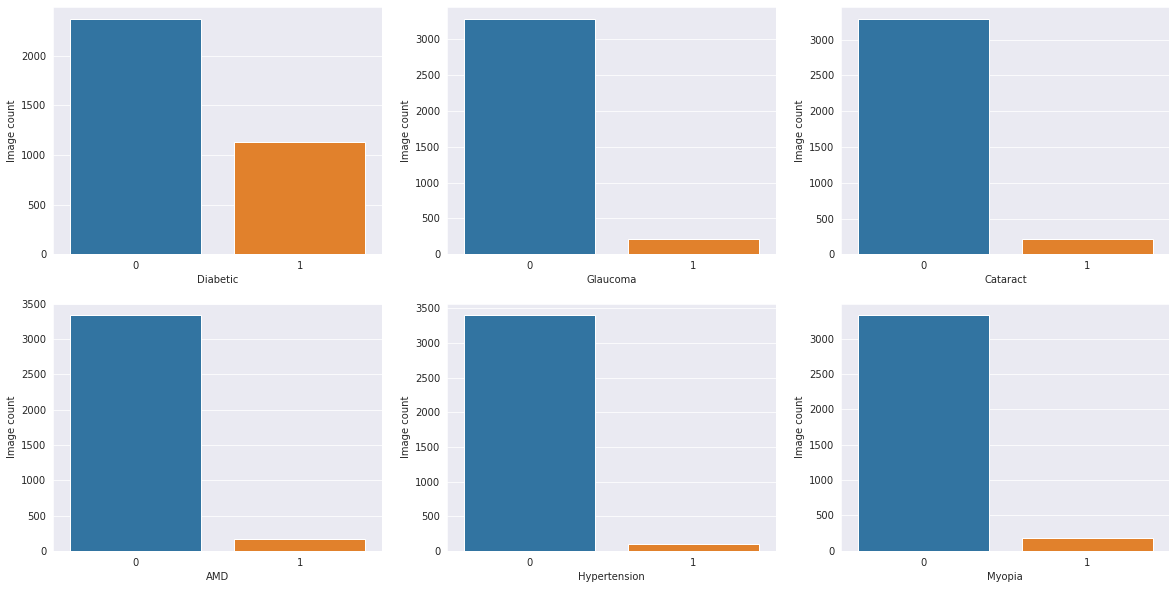

In [64]:
plt.figure(1,figsize=(20,10))
for i in range(6):
  plt.subplot(231+i)
  sns.countplot(x = df[disease[i]])
  plt.ylabel('Image count')
plt.show()


In [0]:
h = df[['Patient Age','Patient Sex']+disease].copy()
corr = h.corr()

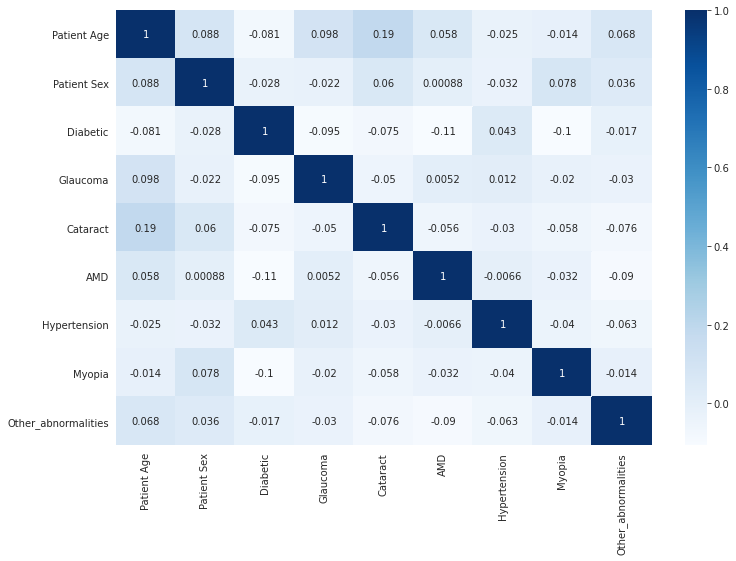

In [43]:
plt.figure(1,figsize=(12,8))
sns.heatmap(corr,cmap='Blues',annot=True)
plt.show()

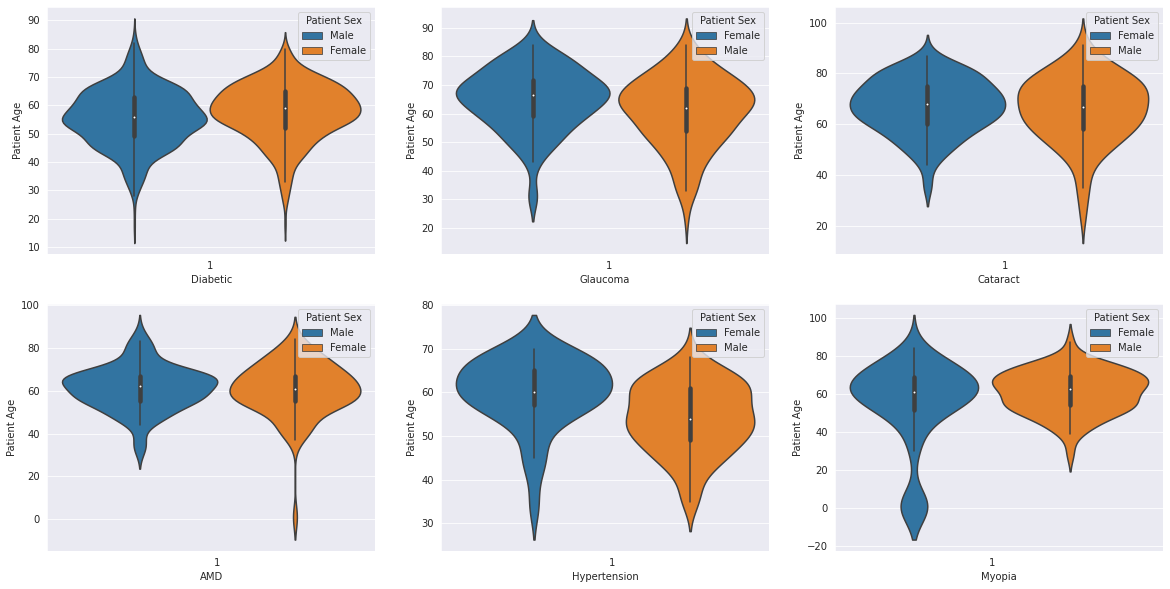

In [63]:
plt.figure(1,figsize=(20,10))
for i in range(6):
  plt.subplot(231+i)
  data = df[df[disease[i]]==1].copy()
  sns.violinplot(x=data[disease[i]],y = data['Patient Age'],hue=data['Patient Sex'])

In [0]:
from wordcloud import WordCloud, STOPWORDS 

In [0]:
comment_words = '' 
stopwords = set(STOPWORDS) 

In [0]:
for val in df['Left-Diagnostic Keywords']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
for val in df['Right-Diagnostic Keywords']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [0]:
wordcloud = WordCloud(width = 1920, height = 1080, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

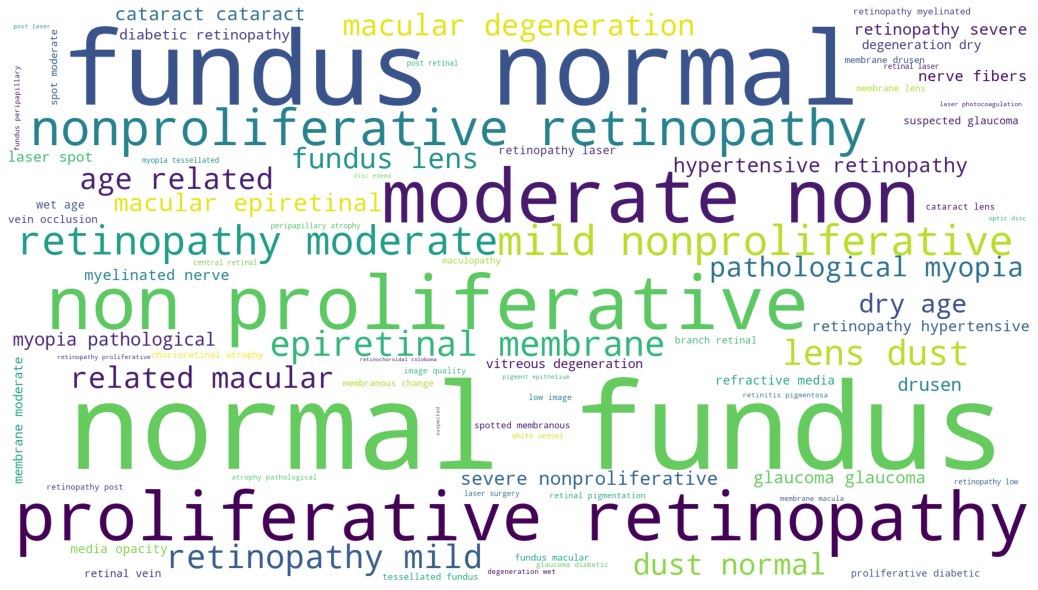

In [78]:
plt.figure(figsize = (22, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 